In [49]:
import pandas as pd
data = pd.read_csv('./tvmarketing.csv')
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [51]:
for i in data.duplicated():
    if i == True:
        print('duplicated')

In [52]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


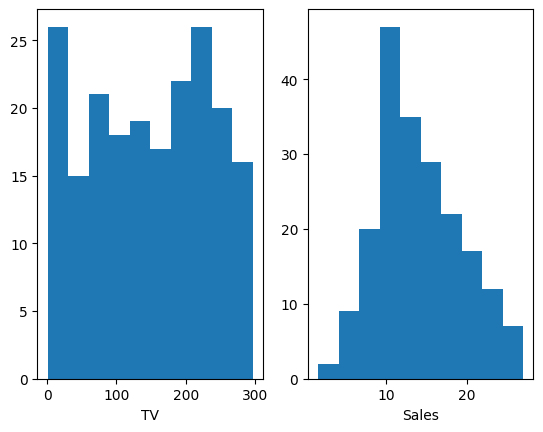

In [53]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.hist(data.TV)
plt.xlabel('TV')
# plt.show()?
plt.subplot(1,2,2)
plt.hist(data.Sales)
plt.xlabel('Sales')
plt.show()

1. break down data into x and y.

In [54]:
x = data.TV
y = data.Sales

In [55]:
# step 2 split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=5)
x_train

159    131.7
62     239.3
166     17.9
45     175.1
23     228.3
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 160, dtype: float64

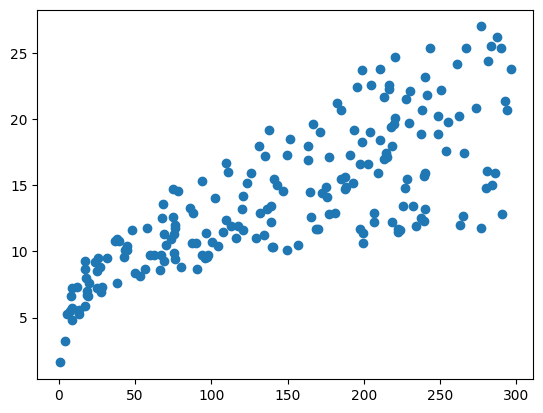

In [56]:
plt.scatter(x,y)
plt.show()

In [57]:
# Build a model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
import numpy as np
x_train = np.array(x_train).reshape(-1,1)
y_trian = y_train[:, np.newaxis]
reg.fit(x_train, y_train)

C:\Users\lokanath\AppData\Local\Temp\ipykernel_5372\481601878.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_trian = y_train[:, np.newaxis]


LinearRegression()

In [62]:
y_pred = reg.predict(np.array(x_test).reshape(-1,1))
comp = pd.DataFrame(y_test)
comp['Prediction'] = y_pred
print(comp)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae, mse, r2)

     Sales  Prediction
119    6.6    7.838389
77    14.2   12.757963
148   10.9    8.743474
149   10.1    9.069499
154   15.6   16.032814
151   11.6   12.782294
122   11.6   17.794323
6     11.8    9.692353
28    18.9   19.001103
71    12.4   12.237296
188   15.9   20.811273
34     9.5   11.551183
21    12.5   18.446374
40    16.6   16.748123
55    23.7   16.572945
104   20.7   18.485302
3     18.5   14.266438
39    21.5   17.988965
117    9.4   10.612036
134   10.8    8.689947
180   10.5   14.514607
26    15.0   13.847958
54    20.2   19.677484
165   11.9   18.305258
53    21.2   15.779779
93    22.2   19.103290
174   11.5   17.716467
17    24.4   20.587435
56     5.5    7.249597
84    21.7   17.283388
25    12.0   19.687216
156   15.3   11.463595
42    20.7   21.181093
141   19.2   16.319911
50    11.4   16.616740
51    10.7   11.779888
195    7.6    8.753206
116   12.2   13.667914
142   20.1   17.624012
24     9.7    9.925923
2.8206196364278027 12.579629630036752 0.4990784791512455


In [63]:
print(reg.intercept_)
print(reg.coef_)

6.894375384032881
[0.04866048]


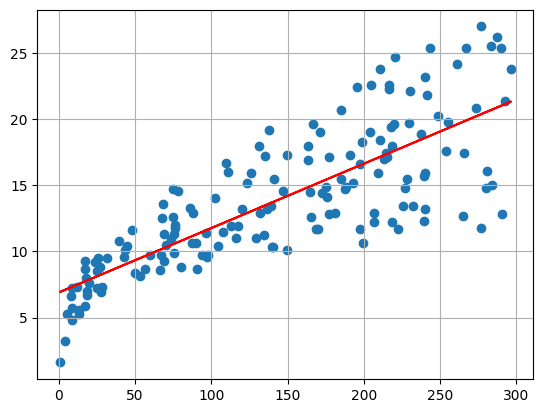

In [64]:
y_train_pred = reg.predict(x_train)
plt.scatter(x_train,y_train)
plt.plot(x_train, y_train_pred, c='r')
plt.grid()
plt.show()

In [65]:
# MUltiple linear regression
df = pd.read_csv('./50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [67]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [68]:
df.corr()
df.State.unique()
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['State'] = enc.fit_transform(df['State'])
df.State.unique()

C:\Users\lokanath\AppData\Local\Temp\ipykernel_5372\3612050527.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


array([2, 0, 1])

In [71]:
# split x and y
x = df.iloc[: ,:-1]
y = df.iloc[: ,-1]
# split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=5)
# create a reg model
regg = LinearRegression()
regg.fit(x_train, y_train)

LinearRegression()

In [72]:
y_pred = regg.predict(x_test)
comp = pd.DataFrame(y_test)
comp['Pred'] = y_pred 
comp

,Profit,Pred
42,71498.49,71089.953950
29,101004.64,99840.113617
6,156122.51,155511.585499
19,122776.86,111864.892271
28,103282.38,100817.393275
17,125370.37,129173.566154
2,191050.39,180845.449901
43,69758.98,58681.965221
3,182901.99,171940.503511
21,111313.02,117092.578843


In [73]:
regg.coef_

array([ 7.74758334e-01, -1.53253624e-02,  3.82106222e-02, -6.64851999e+02])

In [74]:
regg.intercept_

48592.87284482115

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae, mse, r2)

5738.713774997949 52190629.7689377 0.9670002673417638
